The datasets chosen for Image classification are MNIST and CIFAR-10 and for Text
Classification, IMDB Review Dataset is used. The main reason behind choosing such datasets is
because they are also known as benchmark datasets specifically designed for research in academia.
These datasets were suitable for our purpose as they had very little noise and were not skewed
towards one class, which made them quite balanced, and hence pre-processing was much easier.






# IMDB REVIEW DATASET

This is a dataset for binary sentiment classification containing substantially more data than
previous benchmark datasets. It contains 25,000 highly polar movie reviews for training and 25,000
for testing.



In [ ]:
#Mounting drive on Colab

from google.colab import drive
drive.mount('/gdrive', force_remount = True)

Mounted at /gdrive


In [ ]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import numpy as np

In [ ]:
#Loading IMDB Dataset from keras library

(X_train_imdb, y_train_imdb), (X_test_imdb, y_test_imdb) = imdb.load_data()

In [ ]:
X_train.shape

(25000,)

In [ ]:
X = np.concatenate((X_train_imdb, X_test_imdb), axis=0)

In [ ]:
#Concatenate both train and test dataset and count the number of unique sentiments in the output labels.

y = np.concatenate((y_train_imdb, y_test_imdb), axis=0)
unique, counts = np.unique(y, return_counts=True)

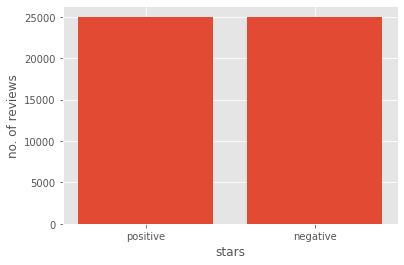

In [ ]:
import matplotlib.pyplot as plt 

#Visualize the number of positive and negative sentiments in the dataset using matplotlib.
x = ['positive', 'negative']
y = counts
plt.style.use(['ggplot'])
plt.bar(x, y) 
plt.xlabel('stars') 
plt.ylabel('no. of reviews') 
plt.show() 

In [ ]:
#Calculate total number of unique words in the reviews of the dataset
print("Number of words: ")
print(len(np.unique(np.hstack(X))))

Number of words: 
88585


Review length: 

Mean 234.76 words (172.911495)



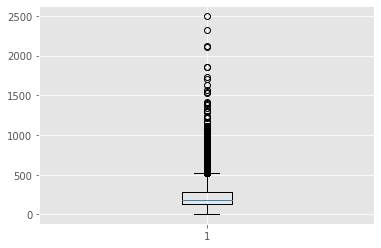

In [ ]:
print("Review length: ")
print()

#Print the mean and the standard deviation of the length of the reviews
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
print()

# Create a box plot for the length of the reviews in the dataset
plt.boxplot(result)
plt.show()

It is inferred from the above graph that most of the reviews range from the length of 0 to 500 words since the average review length is 234 with a S.D of (+/-)172.. Therefore, in order to make sure all of the reviews are of the same length, reviews longer than 500 words are truncated whereas shorter reviews are padded with zeroes.

In [ ]:
#Loading dataset from imdb module of Keras with a vocabulary length of 5000. 
(X_train_imdb, y_train_imdb), (X_test_imdb, y_test_imdb) = imdb.load_data(num_words=5000)

In [ ]:
#Padding text sequences shorter than 500 with zeroes in both train and test set.
X_train_imdb = sequence.pad_sequences(X_train_imdb, maxlen=500)
X_test_imdb = sequence.pad_sequences(X_test_imdb, maxlen=500)

In [ ]:
#Creating a list of names and NumPy Arrays
nameLis = ['X_train_imdb', 'X_test_imdb', 'y_train_imdb', 'y_test_imdb']
Data = [X_train_imdb, X_test_imdb, y_train_imdb, y_test_imdb]


#To iterate over and save on drive
for i, j in nameLis, Data:
  np.save(r'/gdrive/My Drive/'+i, j)

# MNIST Dataset

All the images in the dataset are 28 x 28 grayscale images
with intensity ranging from 0 to 255.


There are 4 files:


1. train-images-idx3-ubyte: training set images
2. train-labels-idx1-ubyte: training set labels
3. t10k-images-idx3-ubyte: test set images
4. t10k-labels-idx1-ubyte: test set labels


The training set contains 60000 examples, and the test set 10000 examples

In [ ]:
import os,codecs,numpy as np,gzip,shutil

class process_mnist:
    def __init__(self,path):
    #Function to initialize the variables defined
        self.path = path
        self.dir = os.listdir(path)
        self.no_of_items = 0
        self.data_arr = {}
        
    def unzip(self):
    #The following function unzips the files present in the path passed as a parameter 
    #according to their extension mentioned
        for file in self.dir:
            if file.endswith('gz'):
                with gzip.open(self.path + "/" + file,'rb') as data_in:
                    with open(self.path +"/" + file.split('.')[0],'wb') as data_out:
                        shutil.copyfileobj(data_in,data_out)
    
    def create_arr(self):
    #The following function reads the .ubyte file in the path provided and assigns
    #category to each file as test or train and image or label according to the specified number in the file.
        for file in self.dir:
            if file.endswith("ubyte"):
                with open(self.path+"/"+file,'rb') as f:
                    data = f.read()
                    type = process_mnist.convert_int(self,data[0:4])
                    no_of_items = process_mnist.convert_int(self,data[4:8])
            
                    if(type == 2051):
                        category = "image"
                        arr = process_mnist.extract_image(self,data,no_of_items)
                    elif(type == 2049):
                        category = "label"
                        arr = process_mnist.extract_label(self,data,no_of_items)
            
                    if(no_of_items == 10000):
                        key = "test"
                    else:
                        key = "train"
                self.data_arr[key+"_"+category] = arr
        print(self.data_arr.keys())
            
        
    def convert_int(self,byte_data):
    #Function toconvert hexadecimal code to integer value.
        return int(codecs.encode(byte_data,'hex'),16)

    def extract_image(self,data,no_of_items):
    #TODO:
    #Convert 4 bits of data sequentially to integer values 
    #And reshape arrays to shape of (no_of_items * rows * cols) 
        rows = process_mnist.convert_int(self,data[8:12])
        cols = process_mnist.convert_int(self,data[12:16])
        arr = np.frombuffer(data,dtype=np.uint8,offset=16)
        arr = arr.reshape(no_of_items,rows,cols)
        return arr

    def extract_label(self,data,no_of_items):
        arr = np.frombuffer(data,dtype=np.uint8,offset=8)
        arr = arr.reshape(no_of_items)
        return arr

In [ ]:
#Initializing variable path and creating object "data"
path = '/gdrive/My Drive/Mnist_data'
data = process_mnist(path)

#Calling function "Unzip" and "Create_arr".
data.unzip()
data.create_arr()

dict_keys(['test_label', 'test_image', 'train_image', 'train_label'])


In [ ]:
#Stor train and test images, labels in their respective variables. 
X_train_mnist = data.data_arr['train_image']
X_test_mnist = data.data_arr['test_image']
y_train_mnist = data.data_arr['train_label']
y_test_mnist = data.data_arr['test_label']

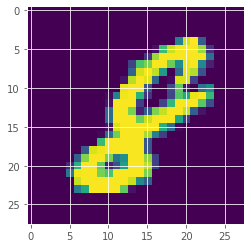

In [ ]:
 from matplotlib import pyplot as plt
import numpy as np
import random

#Randomy plotting sample of MNIST train dataset in matplotlib

first_image = X_train_mnist[random.randint(0, 39999)]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.style.use(['ggplot'])
plt.imshow(pixels)
plt.show()

# CIFAR-10 Dataset

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets

#Importing cifar-10 dataset from tensorlow as train and test set.
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
#Storing dataset in their repsective variables
X_train_cifar = train_images
y_train_cifar = train_labels
X_test_cifar = test_images
y_test_cifar = test_labels

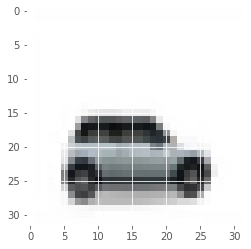

In [ ]:
from matplotlib import pyplot as plt
import random

#Randomly plotting train set sample from CIFAR-10 in matplotlib

plt.style.use(['ggplot'])
plt.imshow(X_train_cifar[random.randint(0,39999)])
plt.show()

# Pickle Files

In [ ]:
import pickle

#Initializing two list "lis" and "lisName" with dataset and their names repectively 
lis = [X_train_imdb, X_test_imdb, y_train_imdb, y_test_imdb, X_train_mnist, X_test_mnist, y_train_mnist, y_test_mnist, X_train_cifar, X_test_cifar, y_train_cifar, y_test_cifar]
lisName = ['X_train_imdb', 'X_test_imdb', 'y_train_imdb', 'y_test_imdb', 'X_train_mnist', 'X_test_mnist', 'y_train_mnist', 'y_test_mnist', 'X_train_cifar', 'X_test_cifar', 'y_train_cifar', 'y_test_cifar']

#Iterate over both of the above lists and pickle them to store in the google drive 
for i in range(0, len(lisName)):
  with open("/gdrive/My Drive/" + lisName[i] + ".pkl",'wb') as f: pickle.dump(lis[i], f)